In [13]:
import numpy as np

# Assignment 1: Black-Scholes Model and Binomial Tree Methods

## Part 1: Option Valuation

### Theory

A commonly used approach to compute the price of an option is the so-called binomial tree method. Suppose that the maturity of an option on a non-dividend-paying stock is divided into N subintervals of length δt . We will refer to the jth node at time iδt as the (i, j) node. The stock price at the (i,j) node is $S_{(i,j)} = S_0u^jd^{(i−j)}$ (with u and d the upward and down-ward stock price movements, respectively). In the binomial tree approach, option prices are computed through a back-ward induction scheme:
1. The value of a call option at its expiration date is $MAX(0,S_{N,j} −K)$;


2. Suppose that the values of the option at time (i + 1)δt is known for all j. There is a probability p of moving from the (i, j) node at time iδt to the (i + 1, j + 1) node at time (i+1)δt , and a probability 1−p of moving from the (i,j) node at time iδt to the (i+1,j) node at time (i + 1)δt . Risk-neutral valuation gives
\begin{equation*}
fi,j = e^{−rδt}(pf_{i+1,j+1}) + (1 − p)f_{i+1,j})
\end{equation*}

### Assignment

Consider a European call option on a non-dividend-paying stock with a maturity of one year and strike price of €99. Let the one year interest rate be 6% and the current price of the stock be €100. Furthermore, assume that the volatility is 20%.

### References / Inspiration

Lecture slides Binomial Model

Theory/code: http://andras.niedermayer.ch/wp-content/uploads/2018/03/Slides_Python4Finance_LA7.pdf

Theory: https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1865&context=gradreports

Code: https://seelio.com/w/2c0v/binomial-pricing-model-for-options

In [40]:
K = 99 # strike price
S0 = 100 # current price of the stock
N = 50 # time steps
sigma = 1.2 # volatility
r = .06 # risk free rate 
T = 1 # year
areaType = "European"

#### 1. Write a binomial tree program to approximate the price of the option. Take a tree with 50 steps. How does your estimate compare to the analytical value? Experiment for different values of the volatility.

OUTSIDE OF PYTHON: Provide analytical value

The value for the European call option for the corresponding parameters is 46.8987060400367


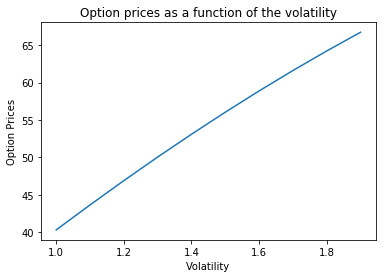

In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt

def binomial_tree(K, S0, N, sigma, r, T, areaType):
    dt = np.float(T)/N # length of a stip in the tree
    u = np.exp(sigma*np.sqrt(dt)) # upward step
    d = 1/u # downward step
    p = (np.exp(r*dt)-d)/(u-d) # risk-neutral probability
    
    ST = np.zeros(N+1) # vector of stock
    option=np.zeros(N+1) # vector of option prices
    
    for i in range(0, N+1): 
        ST[i] = S0*u**(N-i)*d**i 
        option[i] = max((ST[i]-K), 0)
        
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            option[j] = np.exp(-r*dt)*(p*option[j]+(1-p)*option[j+1])
            
            if areaType=="AmericanCall":
                ST[j]=np.exp(-r*dt)*(p*ST[j]+(1-p)*ST[j+1])
                option[j]=max(option[j], max((ST[j]-K),0))
                
            if areaType=="AmericanPut":
                ST[j]=np.exp(-r*dt)*(p*ST[j]+(1-p)*ST[j+1])
                option[j]=max(option[j], max(-1*(ST[j]-K),0))
                
    return(option[0])

# Calculate the option price and print it 
option_price = binomial_tree(K, S0, N, sigma, r, T, area)
print('The value for the European call option for the corresponding parameters is ' + str(option_price))

# Experiment for different values of the volatility

volatilities = [(1+ i/10) for i in range(10)]
option_prices = []
 
for sigma in volatilities:
    option_price = binomial_tree(K, S0, N, sigma, r, T, area)
    option_prices.append(option_price)
    
plt.title('Option prices as a function of the volatility')
plt.plot(volatilities, option_prices)
plt.ylabel('Option Prices')
plt.xlabel('Volatility')
plt.show()


#### 2. Study the convergence of the method for increasing number of steps in the tree. What is the computational complexity of this algorithm as a function of the number of steps in the tree?

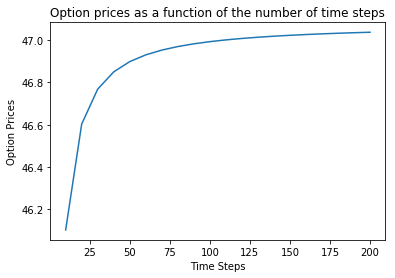

In [53]:
# reset the parameters 

K = 99 # strike price
S0 = 100 # current price of the stock
N = 50 # time steps
sigma = 1.2 # volatility
r = .06 # risk free rate 
T = 1 # year
area = "European"

# Experiment for different values of the volatility

time_steps = [((i+1)*10) for i in range(20)]
option_prices = []
 
for time_step in time_steps:
    option_price = binomial_tree(K, S0, time_step, sigma, r, T, area)
    option_prices.append(option_price)
    
plt.title('Option prices as a function of the number of time steps')
plt.plot(time_steps, option_prices)
plt.ylabel('Option Prices')
plt.xlabel('Time Steps')
plt.show()


#### 4. Now suppose that the option is American. Change the code such that it can handle early exercise opportunities. What is the value of the American put and call for the corresponding parameters? Experiment for different values of the volatility.

The value for the American call option for the corresponding parameters is 46.8987060400367


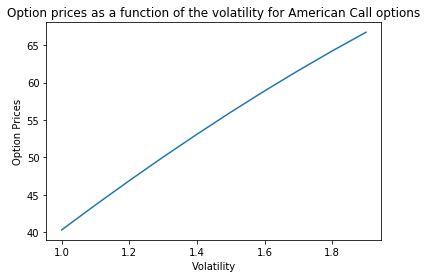


 The value for the American put option for the corresponding parameters is 87.73036350534284


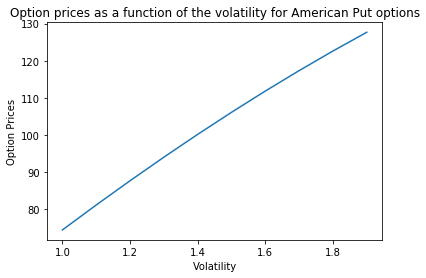

In [58]:
# reset the parameters 

K = 99 # strike price
S0 = 100 # current price of the stock
N = 50 # time steps
sigma = 1.2 # volatility
r = .06 # risk free rate 
T = 1 # year
areaType = "AmericanCall"

# Calculate the option price and print it 
option_price = binomial_tree(K, S0, N, sigma, r, T, areaType)
print('The value for the American call option for the corresponding parameters is ' + str(option_price))

# Experiment for different values of the volatility

volatilities = [(1+ i/10) for i in range(10)]
option_prices = []
 
for sigma in volatilities:
    option_price = binomial_tree(K, S0, N, sigma, r, T, areaType)
    option_prices.append(option_price)
    
plt.title('Option prices as a function of the volatility for American Call options')
plt.plot(volatilities, option_prices)
plt.ylabel('Option Prices')
plt.xlabel('Volatility')
plt.show()

areaType = "AmericanPut"
sigma = 1.2 # reset volatility
option_price = binomial_tree(K, S0, N, sigma, r, T, areaType)
print('\n The value for the American put option for the corresponding parameters is ' + str(option_price))

# Experiment for different values of the volatility

volatilities = [(1+ i/10) for i in range(10)]
option_prices = []
 
for sigma in volatilities:
    option_price = binomial_tree(K, S0, N, sigma, r, T, areaType)
    option_prices.append(option_price)
    
plt.title('Option prices as a function of the volatility for American Put options')
plt.plot(volatilities, option_prices)
plt.ylabel('Option Prices')
plt.xlabel('Volatility')
plt.show()

